In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Generating data

In [69]:
sample_size = int(1e3);
x = np.linspace(0,1, num=sample_size);
y = np.sin(2*np.pi*x)
data = np.sin(2*np.pi*x) + np.random.normal(size=sample_size,scale=0.35);
#data = np.sin(2*np.pi*x) + (np.e**x)*1.7 + np.random.normal(size=sample_size,scale=0.35);

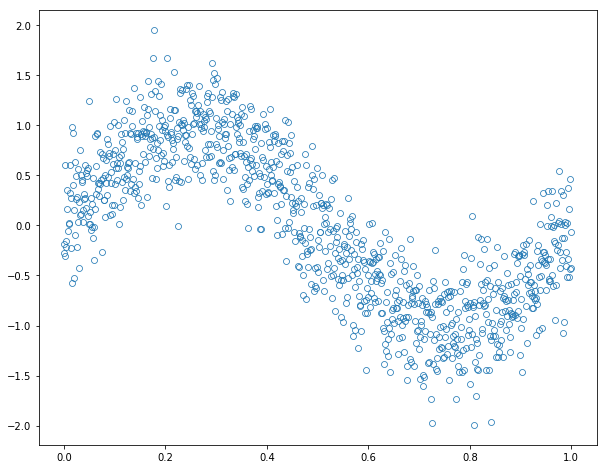

In [70]:
plt.figure(figsize=(10,8))
plt.plot(x,data,'o',markerfacecolor='none',markeredgewidth=0.75);
#plt.show();

#### Splitting data

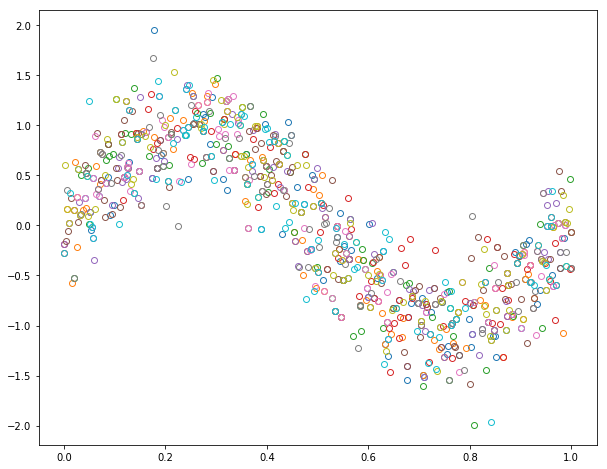

In [101]:
observations = np.zeros((10,1000));
observations[:] = np.nan

plt.figure(figsize=(10,8))

for i in range(10):
    np.random.seed(i)
    rdn_index = np.random.randint(0,1000,100)

    for j in rdn_index:
        observations[i][j] = data[j]
    
    plt.plot(x,observations[i],'o',markerfacecolor='none',markeredgewidth=1);


#### Defining the function

Now, we'll see the problem of $ y(\boldsymbol{x},\boldsymbol{w}) = w_0 + w_1 x^1 + ... + w_D x^D $ and make some changes. Let's choose some arbitrary function class $ \phi(x) $ and then, our previous relation becomes $ y(\boldsymbol{x},\boldsymbol{\phi}) = w_0 + w_1 \phi_1 + ... + w_D \phi_D $, such that $ \phi_i $ are apparently linearly independent. So, in this example we'll choose the function $$ \phi_i = \exp \left( -\frac{(x-\mu_i)^2}{s^2} \right) $$

Defining the design matrix

In [134]:
M = 10

def f_phi(x,mu,s=1):
    aux = x-mu
    return np.e**(-(np.dot(aux,aux.T)) / s**2)

In [136]:
N = 3

phi = np.zeros((M,N))

print(phi)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [137]:
for i in range(N):
    for j in range(M):
        phi[i][j] = f_phi(x,j)

0.0